# Exploratory Data Analysis (EDA)

## Objectives:

1. Sample and feature descriptions
2. Identify data shape, distribution, and spread
3. correlation
4. Discover outliers


In [43]:
# Load Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
data = pd.read_csv('kickstarter_projects.csv')
df = pd.DataFrame(data = data)
# Quick look into kickstarter_projects columns
df.columns

Index(['ID', 'Name', 'Category', 'Subcategory', 'Country', 'Launched',
       'Deadline', 'Goal', 'Pledged', 'Backers', 'State'],
      dtype='object')

## Description of columns (provided by datasource)

1. ID: Internal kickstarter id
2.  Name: Name of the project
3. Category: Project category
4. Subcategory: Project subcategory
5. Country: Country the project is from
6. Launched: Date the project was launched
7. Deadline: Deadline date for crowdfunding
8. Goal: Amount of money the creator needs to complete the project (USD)
9. Pledged: Amount of money pledged by the crowd (USD)
10. Backers: Number of backers
11. State: Current condition the project is in (as of 2018-01-02)

In [44]:
# Understanding 'State' of projects
# replace 'Failed' with 0 & 'Successful' with 1
df.State = df.State.replace({'Failed':0 ,
                             'Successful': 1})
df = df[df["State"] != 'Live']
df = df[df["State"] != 'Canceled']


,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,0
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,0
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,1
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,1
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,0


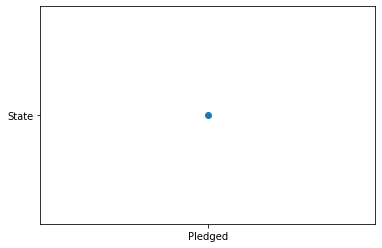